In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
base_dirs = ["../230413/"]
#base_dirs = ["../230411/", "../230410/" ]
#base_dirs = ["../230411/"]
#base_dirs = ["../230410/"]

#base_dirs = ["../230227/"]
#base_dirs = ["../230329/"]

#base_dirs = ["../230331/"]


#base_dirs = ["../230227/","../230328/","../230329/" ]

files = []
which_date = []

for idx, base_dir in enumerate(base_dirs):
    files_in_dir = [base_dir + i for i in os.listdir(base_dir)]
    which_date += [int(base_dir[3:-1])] * len(files_in_dir)
    files += files_in_dir


mask = [files[i][-3:] == "txt" for i in range(len(files))]

files = np.array(files)

spectra_files = files[mask]
which_date = np.array(which_date)[mask]
print(spectra_files)






['../230413/230413_highlands_i45_en30_00006.asd.txt'
 '../230413/230413_highlands_i45_en30_00016.asd.txt'
 '../230413/230413_highlands_i45_e15_00005.asd.txt'
 '../230413/230413_highlands_i45_e15_00015.asd.txt'
 '../230413/230413_highlands_i45_e00_00018.asd.txt'
 '../230413/230413_highlands_i45_e45_00007.asd.txt'
 '../230413/230413_highlands_i45_e00_00008.asd.txt'
 '../230413/230413_highlands_i45_e30_00012.asd.txt'
 '../230413/230413_highlands_i45_e30_00002.asd.txt'
 '../230413/230413_highlands_i45_e60_00000.asd.txt'
 '../230413/230413_highlands_i45_e60_00010.asd.txt'
 '../230413/230413_highlands_i45_en15_00011.asd.txt'
 '../230413/230413_highlands_i45_en15_00001.asd.txt'
 '../230413/230413_highlands_i45_en45_00003.asd.txt'
 '../230413/230413_highlands_i45_en45_00013.asd.txt'
 '../230413/230413_highlands_i45_e00_00001.asd.txt'
 '../230413/230413_highlands_i45_e00_00011.asd.txt'
 '../230413/230413_highlands_i45_en15_00008.asd.txt'
 '../230413/230413_highlands_i45_en15_00018.asd.txt'
 '..

In [3]:
print(which_date)

[230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 230413 230413 230413 230413 230413 230413 230413 230413 230413 230413
 23041

In [4]:
test_file = spectra_files[0]

df = pd.read_csv(test_file, delimiter = '\t')
wl = df["Wavelength"].to_list()
wl_str= [str(i) for i in wl]

print(wl)

col_names = ['Phase Angle'] + wl_str + ['Date Taken']
print(col_names)
print(df.iloc[:,1].to_list())

[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549,

In [5]:
df_spectralon = pd.read_excel("/Users/jordanando/Documents/Research/Li Group Research/Labwork/SpectralonCorrectionFactors.xlsx")
display(df_spectralon)

spectralon_angle = df_spectralon['Emission angle'].to_numpy()
spectralon_corr= df_spectralon['Correction factor'].to_numpy()

def compute_spectralon_correction(e):
    return np.interp(e, spectralon_angle[::-1], spectralon_corr)


print(compute_spectralon_correction(70))

Emission angle  Correction factor
0               80           0.837524
1               70           0.891619
2               60           0.928419
3               50           0.966284
4               40           0.988683
5               30           0.984793
6               20           0.986113
7               10           0.992574
8                1           0.999488
9               -1           1.000500
10             -10           1.003180
11             -20           1.016620
12             -30           1.026870
13             -40           1.042610
14             -50           1.059080
15             -60           1.070040
16             -70           1.091200
17             -80           1.099570

1.0912


In [16]:
compute_spectralon_correction(40)

1.04261

In [6]:
df_rows = []

for idx, file in enumerate(spectra_files):
    print(file)
    df_file = pd.read_csv( file, delimiter = '\t')

    e_index = file.find("i45_e") + 4

    row_entries = []
    if file[e_index + 1] == "n":
        e = -int(file[e_index + 2:e_index+4])
        row_entries.append((e+45))
        
    else:
        e = int(file[e_index + 1:e_index+3])
        row_entries.append(e+45)
    print("e: ", e)
    print("g: ", row_entries[0])

    spectrum = df_file.iloc[:,1].to_numpy()

    spectrum *= compute_spectralon_correction(e)
    print(compute_spectralon_correction(e))

    row_entries += spectrum.tolist()
    print(which_date[idx])
    print(idx)
    row_entries.append(which_date[idx])


    df_rows.append(row_entries)

#print(df_rows)
    

        

../230413/230413_highlands_i45_en30_00006.asd.txt
e:  -30
g:  15
0.984793
230413
0
../230413/230413_highlands_i45_en30_00016.asd.txt
e:  -30
g:  15
0.984793
230413
1
../230413/230413_highlands_i45_e15_00005.asd.txt
e:  15
g:  60
1.0099
230413
2
../230413/230413_highlands_i45_e15_00015.asd.txt
e:  15
g:  60
1.0099
230413
3
../230413/230413_highlands_i45_e00_00018.asd.txt
e:  0
g:  45
0.999994
230413
4
../230413/230413_highlands_i45_e45_00007.asd.txt
e:  45
g:  90
1.050845
230413
5
../230413/230413_highlands_i45_e00_00008.asd.txt
e:  0
g:  45
0.999994
230413
6
../230413/230413_highlands_i45_e30_00012.asd.txt
e:  30
g:  75
1.02687
230413
7
../230413/230413_highlands_i45_e30_00002.asd.txt
e:  30
g:  75
1.02687
230413
8
../230413/230413_highlands_i45_e60_00000.asd.txt
e:  60
g:  105
1.07004
230413
9
../230413/230413_highlands_i45_e60_00010.asd.txt
e:  60
g:  105
1.07004
230413
10
../230413/230413_highlands_i45_en15_00011.asd.txt
e:  -15
g:  30
0.9893434999999999
230413
11
../230413/230413_h

In [7]:
len(spectra_files)

145

In [8]:
print(df_rows)

[[15, 0.32662955807632443, 0.315213719012278, 0.3126727912369743, 0.3156276121823979, 0.3122091022933397, 0.3086489184856807, 0.3088598032943185, 0.3088662336282509, 0.3105382258810239, 0.30903994989169997, 0.3034278545105069, 0.30663026063763354, 0.30696646272084444, 0.3060986988104289, 0.30864950332693514, 0.3052997240247803, 0.30398529026885146, 0.305620303739304, 0.30561600021923274, 0.30627562517404766, 0.30664139387806033, 0.3063126525750432, 0.30604587867368727, 0.3078808919318805, 0.3094791235911953, 0.3089991671449204, 0.3083632228602542, 0.30792885308220724, 0.30785943754945694, 0.3082060546244054, 0.3094809357007774, 0.31018070310195994, 0.310161758125153, 0.310408629096277, 0.31182179276008304, 0.31266454410282774, 0.31260371075183285, 0.31373999887852566, 0.3142195924651434, 0.3139518978806838, 0.31352888072660867, 0.3141361827780273, 0.31541347017666677, 0.31643013590219954, 0.31644366230334225, 0.3169208999798459, 0.3174322540864124, 0.31777254093094365, 0.31807441965693

In [9]:
df_spectra = pd.DataFrame(df_rows, columns=col_names)
display(df_spectra)

df_spectra.sort_values(by = ['Phase Angle'], inplace = True)
#display(df_spectra)

df_spectra.reset_index(inplace=True, drop = True)

display(df_spectra)

df_spectra.to_csv(base_dirs[0][3:-1] + "_Spectra_Highlands_Simulant_CORRECTED.csv")

Phase Angle       350       351       352       353       354       355  \
0             15  0.326630  0.315214  0.312673  0.315628  0.312209  0.308649   
1             15  0.317968  0.311080  0.309648  0.320225  0.311427  0.304386   
2             60  0.307695  0.306811  0.301350  0.298279  0.293368  0.290289   
3             60  0.305192  0.305652  0.301209  0.292731  0.287735  0.288032   
4             45  0.287186  0.281753  0.277339  0.271994  0.269195  0.269017   
..           ...       ...       ...       ...       ...       ...       ...   
140           15  0.328905  0.325164  0.322506  0.321910  0.316374  0.311653   
141           15  0.328133  0.323067  0.319440  0.319137  0.310810  0.304778   
142           90  0.322528  0.320200  0.309193  0.308964  0.306016  0.304361   
143           60  0.310732  0.308565  0.303320  0.297085  0.294586  0.293660   
144           60  0.306486  0.306284  0.302281  0.294120  0.289888  0.289626   

          356       357       358  ...      2492      2493      2494  \
0    0.308860  0.308866  0.310538  ...  0.408146  0.408155  0.408002   
1    0.309291  0.308286  0.305254  ...  0.410823  0.410779  0.410430   
2    0.290526  0.291240  0.289904  ...  0.412521  0.412673  0.412859   
3    0.291506  0.292437  0.290175  ...  0.413996  0.414130  0.414406   
4    0.269230  0.264952  0.263479  ...  0.410844  0.410888  0.410738   
..        ...       ...       ...  ...       ...       ...       ...   
140  0.310649  0.309348  0.306644  ...  0.413818  0.413716  0.413368   
141  0.305135  0.301831  0.302890  ...  0.405228  0.405310  0.404936   
142  0.305647  0.304424  0.304200  ...  0.441418  0.441554  0.441711   
143  0.292819  0.293350  0.291617  ...  0.418063  0.418148  0.418134   
144  0.290547  0.287739  0.286800  ...  0.407856  0.407905  0.407774   

         2495      2496      2497      2498      2499      2500  Date Taken  
0    0.407982  0.407954  0.408214  0.408890  0.409228  0.409639      230413  
1    0.410527  0.410917  0.411102  0.411558  0.411931  0.412105      230413  
2    0.413084  0.413429  0.413583  0.413586  0.413728  0.413741      230413  
3    0.414620  0.414660  0.414843  0.415076  0.415346  0.415700      230413  
4    0.410806  0.411315  0.411409  0.411362  0.411298  0.410827      230413  
..        ...       ...       ...       ...       ...       ...         ...  
140  0.413450  0.413923  0.414201  0.414761  0.415174  0.415144      230413  
141  0.405112  0.405683  0.405831  0.406066  0.406306  0.406178      230413  
142  0.441836  0.441884  0.441987  0.442111  0.442262  0.442348      230413  
143  0.418306  0.418598  0.418849  0.419317  0.419574  0.419598      230413  
144  0.407803  0.407709  0.407837  0.408373  0.408639  0.408879      230413  

[145 rows x 2153 columns]

Phase Angle       350       351       352       353       354       355  \
0              0  0.339992  0.290046  0.299011  0.313388  0.326440  0.328824   
1              0  0.362598  0.333489  0.322826  0.310136  0.313012  0.337527   
2              0  0.335308  0.303300  0.316421  0.296147  0.297774  0.319936   
3              0  0.325454  0.283087  0.281764  0.297761  0.314139  0.326986   
4              0  0.338185  0.307419  0.355721  0.339018  0.337173  0.345574   
..           ...       ...       ...       ...       ...       ...       ...   
140          105  0.369114  0.366673  0.363026  0.361650  0.358116  0.355997   
141          105  0.387834  0.387620  0.380955  0.375728  0.376659  0.375248   
142          105  0.377997  0.374274  0.366323  0.368685  0.364797  0.360094   
143          105  0.374808  0.373053  0.367670  0.360472  0.360228  0.360614   
144          105  0.358516  0.357768  0.358995  0.356522  0.356736  0.354896   

          356       357       358  ...      2492      2493      2494  \
0    0.315602  0.288767  0.312635  ...  0.416722  0.417617  0.422299   
1    0.366298  0.337799  0.344495  ...  0.411364  0.408994  0.404580   
2    0.341267  0.313726  0.315634  ...  0.415131  0.416017  0.415833   
3    0.336431  0.347973  0.321989  ...  0.405992  0.405394  0.403522   
4    0.347887  0.324959  0.328169  ...  0.411744  0.410977  0.409701   
..        ...       ...       ...  ...       ...       ...       ...   
140  0.355879  0.352155  0.350539  ...  0.488727  0.488757  0.488638   
141  0.369410  0.368999  0.367782  ...  0.510192  0.510262  0.510616   
142  0.359211  0.361066  0.358078  ...  0.503912  0.504120  0.504354   
143  0.358244  0.357241  0.356739  ...  0.503436  0.503644  0.504121   
144  0.350578  0.351793  0.352520  ...  0.489154  0.489321  0.489347   

         2495      2496      2497      2498      2499      2500  Date Taken  
0    0.423349  0.420655  0.421703  0.422768  0.423983  0.428756      230413  
1    0.403411  0.405397  0.405922  0.407908  0.409404  0.409391      230413  
2    0.417522  0.417721  0.418153  0.423059  0.423418  0.417764      230413  
3    0.403116  0.402626  0.404650  0.411518  0.413599  0.413960      230413  
4    0.408036  0.403615  0.403843  0.408967  0.410065  0.413057      230413  
..        ...       ...       ...       ...       ...       ...         ...  
140  0.488697  0.488935  0.489179  0.489563  0.489915  0.490393      230413  
141  0.510922  0.511464  0.511844  0.512156  0.512349  0.512398      230413  
142  0.504558  0.504639  0.504808  0.505023  0.505268  0.505536      230413  
143  0.504450  0.504768  0.505005  0.505071  0.505265  0.505385      230413  
144  0.489438  0.489325  0.489405  0.489788  0.489990  0.490116      230413  

[145 rows x 2153 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


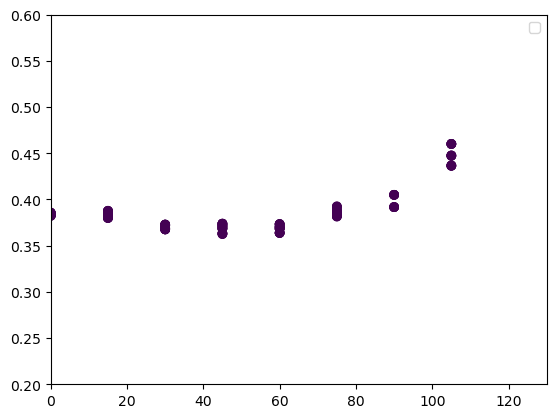

In [10]:



plt.figure()


plt.scatter(df_spectra["Phase Angle"].to_list(), df_spectra["700"].to_list(), c = df_spectra["Date Taken"].to_list())
plt.xlim(0, 130)
plt.ylim(.2,.6)
plt.legend()
plt.show()

Text(0, 0.5, 'R (0.7 $\\mu$m)')

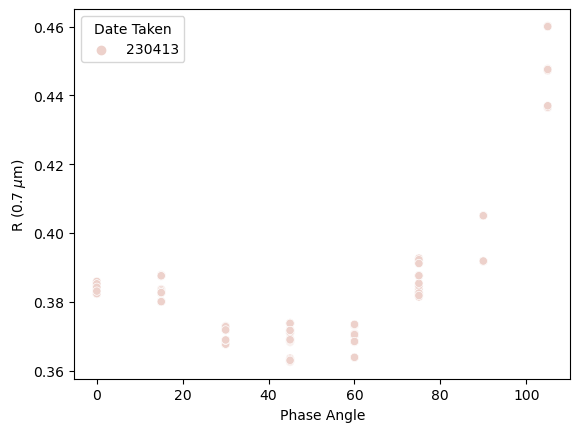

In [11]:
import seaborn as sns

sns.scatterplot(data = df_spectra, x = "Phase Angle", y = "700", hue = "Date Taken", style = "Date Taken")
plt.ylabel("R (0.7 $\mu$m)")

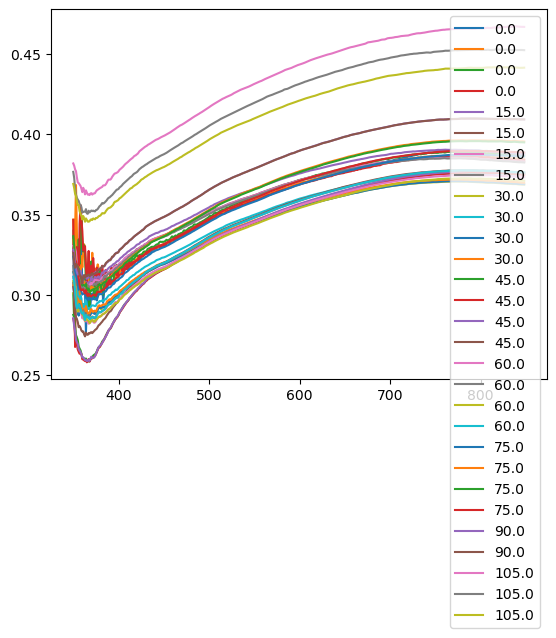

In [12]:
plt.figure()

n = 500

for (idx, row) in df_spectra.iterrows():
    if idx % 5 != 0:
        continue
    plt.plot(wl[:n-1], row.iloc[1:n], label = row.iloc[0])

plt.legend()
plt.show()

In [13]:
print(df_spectra["700"])

0      0.383489
1      0.382408
2      0.385030
3      0.384829
4      0.384049
         ...   
140    0.436582
141    0.460010
142    0.447231
143    0.447537
144    0.436988
Name: 700, Length: 145, dtype: float64


In [14]:
gs = np.unique(df_spectra["Phase Angle"])
mean_700 = []
std_700 = []

print(gs)

for idx, g in enumerate(gs):
    meas = df_spectra[df_spectra["Phase Angle"] == g]['700']
    #display(meas)

    mean_700.append(np.mean(meas))
    std_700.append(np.std(meas))

print(mean_700)

rows = [gs.tolist(), mean_700, std_700]

rows = np.array(rows).T.tolist()

print(rows)
cols = ["Phase Angle", 700, "std"]
    
df_mean = pd.DataFrame(rows, columns=cols)
display(df_mean)

df_mean.sort_values(by = ['Phase Angle'], inplace = True)
#display(df_spectra)

df_mean.reset_index(inplace=True, drop = True)

display(df_mean)

df_mean.to_csv(base_dirs[0][3:-1] + "_Spectra_Highlands_Simulant_MEAN.csv")

[  0  15  30  45  60  75  90 105]
[0.38400193298249974, 0.3834002446084478, 0.37027873183865456, 0.3692189666046779, 0.3689939013731459, 0.38632669506512707, 0.39840147171119117, 0.44805412970369424]
[[0.0, 0.38400193298249974, 0.0011740428261547342], [15.0, 0.3834002446084478, 0.002704203579866126], [30.0, 0.37027873183865456, 0.002092353216771535], [45.0, 0.3692189666046779, 0.004016448823505937], [60.0, 0.3689939013731459, 0.0034568140603752308], [75.0, 0.38632669506512707, 0.0038063633012999326], [90.0, 0.39840147171119117, 0.0066249329624775205], [105.0, 0.44805412970369424, 0.009587579352444855]]


Phase Angle       700       std
0          0.0  0.384002  0.001174
1         15.0  0.383400  0.002704
2         30.0  0.370279  0.002092
3         45.0  0.369219  0.004016
4         60.0  0.368994  0.003457
5         75.0  0.386327  0.003806
6         90.0  0.398401  0.006625
7        105.0  0.448054  0.009588

Phase Angle       700       std
0          0.0  0.384002  0.001174
1         15.0  0.383400  0.002704
2         30.0  0.370279  0.002092
3         45.0  0.369219  0.004016
4         60.0  0.368994  0.003457
5         75.0  0.386327  0.003806
6         90.0  0.398401  0.006625
7        105.0  0.448054  0.009588

<ErrorbarContainer object of 3 artists>

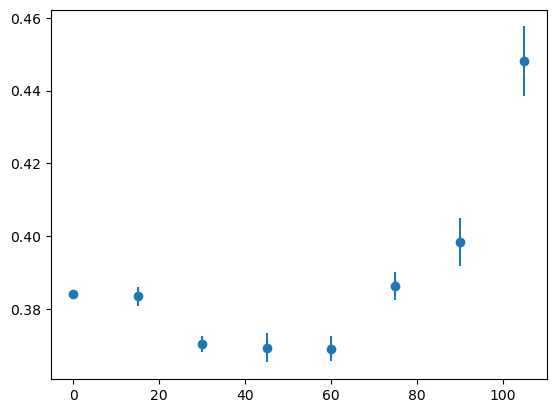

In [15]:
plt.errorbar(df_mean["Phase Angle"], df_mean[700], fmt ='o', xerr = 0, yerr = df_mean["std"])
